In [1]:
#!pip install --upgrade pandas seaborn

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings

warnings.filterwarnings('ignore')

In [3]:
# Cargamos el dataset
df = pd.read_csv('insurance.csv', sep=',')

In [4]:
# Información general de dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
# Mostramos las primeras filas del dataset
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Elegimos variables predictoras
Consideramos las siguientes variables: 
- age (edad): La edad puede influir en el costo del seguro, ya que las personas mayores pueden tener más necesidades médicas.
- bmi (Índice de Masa Corporal): Un alto BMI puede estar relacionado con problemas de salud.
- children (Número de hijos): Puede afectar el costo del seguro debido a cobertura familiar.
- smoker (Fumador): Fumar es un factor de riesgo de salud significativo.
- region (Región): Puede influir debido a costos médicos variables en diferentes regiones.

In [6]:
# Separamos en variables predictoras X y variable de respuesta y.
X = df.drop(columns=['charges'])
y = df['charges']

In [7]:
# Codificar variables categóricas
categorical_features = ["sex", "smoker", "region"]
ohe = OneHotEncoder(drop='first', sparse=False)  # Codificación One-Hot sin la primera categoría para evitar colinealidad
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

In [8]:
# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [9]:
# Escalar las variables numéricas para mejorar la estabilidad del modelo
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Entrenar un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [11]:
# Realizar predicciones
y_pred = model.predict(X_test_scaled)

In [12]:
# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [13]:
# Mostramos las métricas de evaluación
print(f"MAE: {mae}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

MAE: 4181.194473753651
MSE: 33596915.851361476
RMSE: 5796.284659276274
R2 Score: 0.7835929767120722


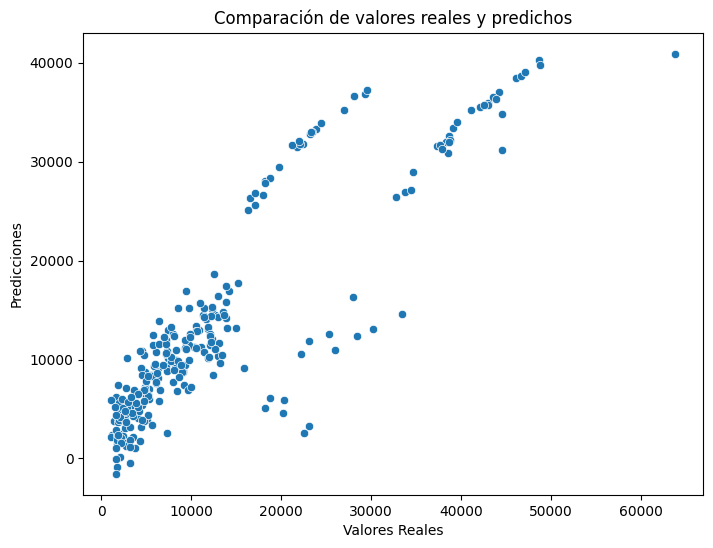

In [14]:
# Visualización de predicciones vs valores reales
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Valores Reales")
plt.ylabel("Predicciones")
plt.title("Comparación de valores reales y predichos")
plt.show()

Al analizar las métricas de error del modelo y la gráfica comparando los valores reales con los predichos vemos que el modelo tiene ciertos problemas al poder realizar predicciones confiables. En la gráfica mostrada, lo que se busca es que los datos estén lo más cerca posible de la recta $y = x$, dado que en este caso se tienen varios datos fuera de esta recta y formando un patrón de una rectá más empinada. Esto puede deberse a dos razones, a que el modelo no captura bien la relación entre las variables o que no es el modelo adecuado. Esto era esperable, dado que estamos trabajando con Regresión Lineal, se podría intentar trabajar con un algoritmo capaz de capturar relaciones más complejas como, el clásico, Random Forest.